<a href="https://colab.research.google.com/github/NRmethun/ML-DL-Notebook/blob/main/explain_CF_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dice-ml

In [ ]:
!pip install dice-ml
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import shap
import dice_ml
from dice_ml import Dice
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/heart.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Shape of shap_values: (205, 13, 2)


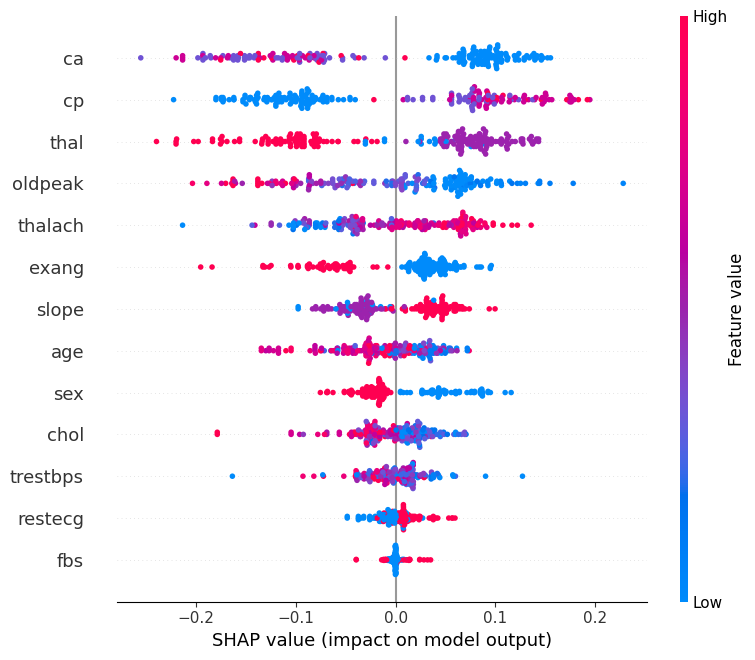

In [ ]:

# Explainable AI with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
print(f"Shape of shap_values: {np.array(shap_values).shape}")
# Summary plot to show feature importance
# shap.summary_plot(shap_values[1], X_test)

# Take the SHAP values for the positive class (class 1)
shap_values_class1 = shap_values[:, :, 1]

# Now plot the SHAP summary
shap.summary_plot(shap_values_class1, X_test)



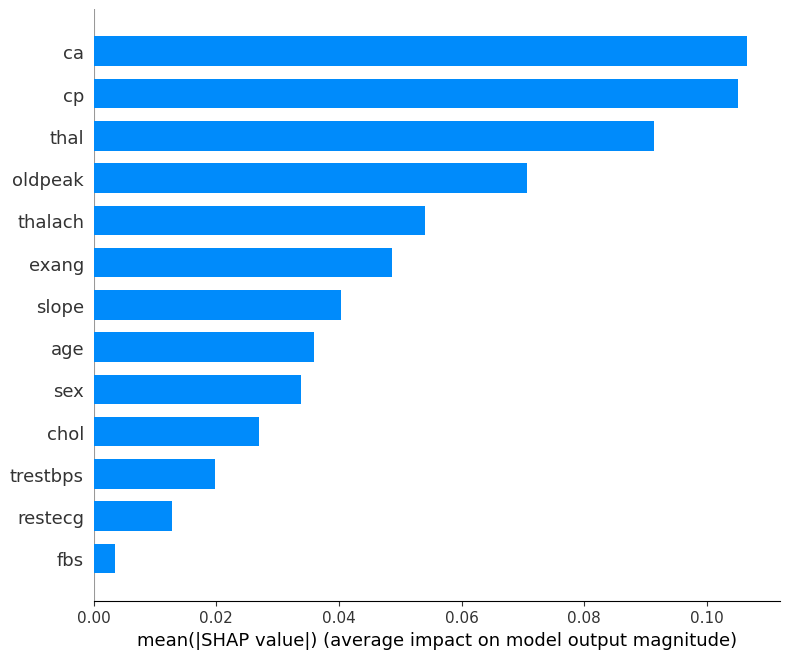

In [ ]:
# Bar plot of mean absolute SHAP values
shap_values_class1 = shap_values[:, :, 1]  # For the positive class
shap.summary_plot(shap_values_class1, X_test, plot_type="bar")


In [ ]:
# Calculate the difference between the two class outputs (for binary classification)


In [ ]:

# Counterfactual Explanations with DiCE
# Define model for DiCE
d = dice_ml.Data(dataframe=data, continuous_features=["cp", "ca", "chol", "thalach"],
                 outcome_name='target')
m = dice_ml.Model(model=model, backend="sklearn")

# Create DiCE explainer
dice = Dice(d, m)

# Generate counterfactuals for a sample instance
sample = X_test.iloc[0:1]
cf = dice.generate_counterfactuals(sample, total_CFs=3, desired_class="opposite")

# Display the counterfactual explanations
cf.visualize_as_dataframe()


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.11/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '101' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.11/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is de

Query instance (original outcome : 1)



/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1



Diverse Counterfactual set (new outcome: 0)


/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,0,0,124,209,0,1,163,0,0.0,1,2,2,0
1,62,0,0,124,209,0,1,163,0,0.0,0,2,2,0
2,62,1,0,124,209,0,1,163,0,0.0,2,1,2,0
